<a href="https://colab.research.google.com/github/anammagalhaes/Estudo_de_casos_COVID19/blob/main/Estudo_de_casos_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breve panorama do COVID-19**

Este projeto tem como objetivo aplicar técnicas de Data Science para analisar e extrair informações sobre a pandemia na ótica brasileira. 

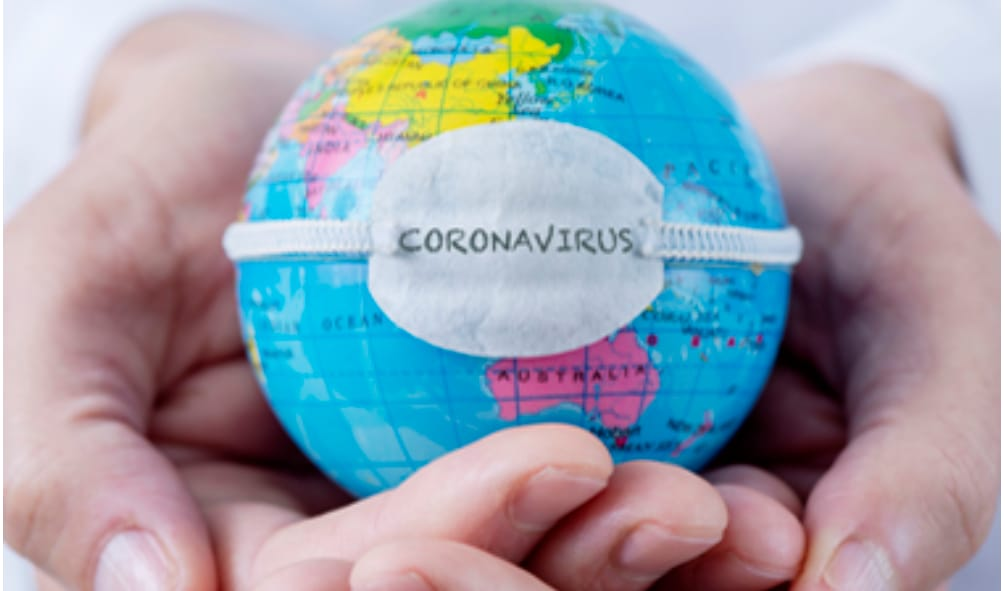

## Contextualização 

Coronavírus é uma família de vírus que causa infecções respiratórias. Atualmente, seu nome está sendo associado à pandemia de COVID-19. O SARS-CoV-2, nova espécie de coronavírus foi responsável pela doença cujas manifestações incluem desde quadro leves como perda de olfato e paladar, gripe até casos mais graves de pneumonia e morte. 

Segundo dados da Organização Mundial da Saúde (OMS), cerca de 80% das pessoas com COVID-19 podem ser assintomáticos ou desenvolver poucos sintomas da doença. Já aproximadamente 20% dos casos pede atendimento hospitalar por apresentarem dificuldade respiratória - e, desse número, 5% pode precisar de suporte ventilatório.

A pandemia engrandece a necessidade do levantamento e analise de dados nacionais e mundiais para extrair informações, estimar a gravidade da situação a fim de auxiliar na tomada de decisão e definição de políticas públicas. Este projeto tem capacidade de agregar conhecimento à cerca da situação mundial e brasileira  utilizando Python e suas bibliotecas para análise exploratória dos dados. 


## Obtenção dos dados 

Os dados utilizados neste projeto são atualizados no [Our World in data](https://https://ourworldindata.org/coronavirus). No entanto, um banco de dados atualizado até a data de 15 de junho de 2020 pode ser obtido neste [link ](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) já em formato csv. 



## Análise Exploratória dos Dados 

Primeiramente, deve-se importar os pacotes do Python necessários e logo após, importar o dataset criando um dataframe. 

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv')

É importante que se saiba a dimensão do dataset, ou seja, o número de entradas (linhas) e o de variáveis, ou features (colunas). 

In [ ]:
# verificando a dimensão do dataset 

print("Dimensão do Dataset")
print("Variáveis:", df.shape[1])
print("Entradas:", df.shape[0])

Dimensão do Dataset
Variáveis: 33
Entradas: 24023


Além disso, é importante imprimir algumas das entradas para ter uma noção geral de como os dados estão distribuidos. Então vamos imprimir as cinco primeiras. Desta forma, podemos analisar previamente se há algum erro bastante visivel ou variáveis com muitos valores faltantes. 

In [ ]:
# primeiras cinco entradas do dataset 

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [ ]:
#verificação dos nomes das colunas 

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

É interessante verificar o tipo das variáveis, principalmente para identificar se há strings. O método dtypes permite isso.

In [ ]:
# verificando o tipo das variáveis 

df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

A partir disso, podemos analisar que a variável date não está em formato datetime. É importante que ela esteja para que possamos explorar ao máximo as informações que podem ser obtidas a partir dela. Por isso, podemos transformá-la para este formato, que será feito logo adiante. As demais variáveis, conseguiremos trabalhar com elas no formato em que estão. 


Outro detalhe importante é a verificação em relação aos dados ausentes. Isso permite decidir quais serão as próximas análises, de tratamento e limpeza dos dados. 

In [ ]:
# verificando dados ausentes (a lista é descendente, do maior para o menor)
round((df.isnull().sum() / df.shape[0]).sort_values(ascending=False),2)

new_tests                          0.76
new_tests_per_thousand             0.76
total_tests                        0.73
total_tests_per_thousand           0.73
new_tests_smoothed                 0.71
new_tests_smoothed_per_thousand    0.71
tests_units                        0.68
handwashing_facilities             0.60
extreme_poverty                    0.40
male_smokers                       0.28
female_smokers                     0.27
stringency_index                   0.21
hospital_beds_per_thousand         0.17
aged_65_older                      0.11
gdp_per_capita                     0.10
aged_70_older                      0.10
median_age                         0.09
cvd_death_rate                     0.09
diabetes_prevalence                0.06
population_density                 0.04
new_cases_per_million              0.01
new_deaths_per_million             0.01
total_deaths_per_million           0.01
total_cases_per_million            0.01
continent                          0.01


In [ ]:
# transformando a coluna data para o formato datetime 


df.date = pd.to_datetime(df.date)

Após alterar o formato, vamos verificar qual a data mais recente do nosso dataset. Com essa informação, vamos verificar o país líder em casos naquele momento.


In [ ]:
# verificando a data mais recente do dataset
df.date.max() 

Timestamp('2020-06-15 00:00:00')

A data mais recente do dataset é 15 de junho de 2020.

In [ ]:
# total de casos na última data registrada em todo o mundo (total de casos de forma descendente, do maior para o menor)
df.loc[df.date == '2020-06-15'].sort_values(by="total_cases", ascending=False) 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,55.583,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,349.641,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,203.858,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
18171,RUS,Europe,Russia,2020-06-15,528964.0,8835.0,6948.0,119.0,3624.668,60.541,47.610,0.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050
10141,IND,Asia,India,2020-06-15,332424.0,11502.0,9520.0,325.0,240.886,8.335,6.899,0.236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,VGB,North America,British Virgin Islands,2020-06-15,8.0,0.0,1.0,0.0,264.577,0.000,33.072,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.023700e+04,207.973,NaN,NaN,NaN,NaN,NaN,NaN,13.67,NaN,NaN,NaN,NaN
17012,PNG,Oceania,Papua New Guinea,2020-06-15,8.0,0.0,0.0,0.0,0.894,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.947027e+06,18.220,22.6,3.808,2.142,3823.194,NaN,561.494,17.65,23.500,48.800,NaN,NaN
2925,BES,North America,Bonaire Sint Eustatius and Saba,2020-06-15,7.0,0.0,0.0,0.0,266.962,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.622100e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12602,LSO,Africa,Lesotho,2020-06-15,4.0,0.0,0.0,0.0,1.867,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142252e+06,73.562,22.2,4.506,2.647,2851.153,59.6,405.126,3.94,0.400,53.900,2.117,NaN


Na data mencionada, podemos observar os países em que apresentam maiores números de casos aos 15 de Junho de 2020 eram:

Estados Unidos com 2.094.069 casos, em seguida o Brasil, com 867.624 casos e a 
Russia com 528.964 casos.

Agora, vamos verificar os casos de morte.


In [ ]:
# total de mortes

df.loc[df.date == '2020-06-15'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
23958,OWID_WRL,NaN,World,2020-06-15,7882230.0,121922.0,433259.0,3129.0,1011.217,15.641,55.583,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705
22874,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,349.641,0.894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,203.858,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200
22706,GBR,Europe,United Kingdom,2020-06-15,295889.0,1514.0,41698.0,36.0,4358.616,22.302,614.236,0.530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.000,24.700,NaN,2.540
11226,ITA,Europe,Italy,2020-06-15,236989.0,338.0,34345.0,44.0,3919.647,5.590,568.044,0.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.800,27.800,NaN,3.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7929,PYF,Oceania,French Polynesia,2020-06-15,60.0,0.0,0.0,0.0,213.596,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.809040e+05,77.324,32.7,7.775,4.593,NaN,NaN,NaN,22.63,NaN,NaN,NaN,NaN
7504,FJI,Oceania,Fiji,2020-06-15,18.0,0.0,0.0,0.0,20.079,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.964440e+05,49.562,28.6,6.224,3.284,8702.975,1.4,412.820,14.49,10.200,34.800,NaN,2.300
18439,LCA,North America,Saint Lucia,2020-06-15,19.0,0.0,0.0,0.0,103.469,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.836290e+05,293.187,34.9,9.721,6.405,12951.839,NaN,204.620,11.62,NaN,NaN,87.202,1.300
7416,FLK,South America,Falkland Islands,2020-06-15,13.0,0.0,0.0,0.0,3732.415,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.483000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Em relação às mortes e na mesma data, 15 de Junho de 2020 os paises que apresentaram maiores números foram Estados Unidos com 115.732, Brasil - 43.332 e Grã-Bretanha - 41.698.

Para melhorar a visualização, vamos plotar um gráfico de barras.


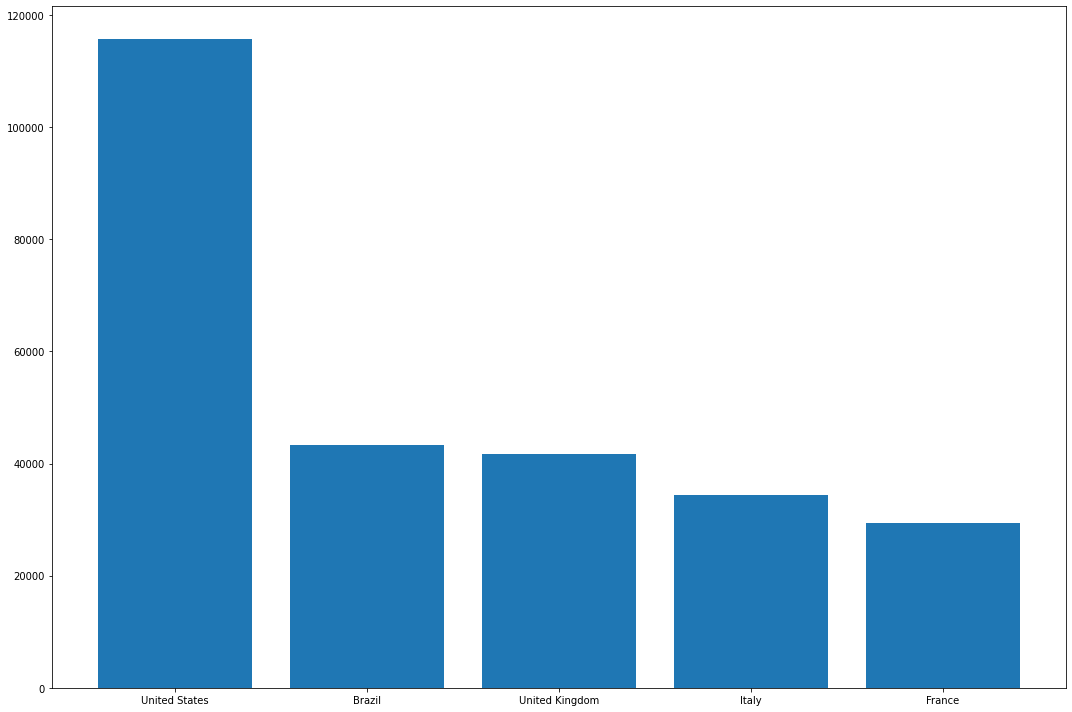

In [ ]:
# gráfico de barras para total de mortes ([1:6] é para pegar os 5 maiores no número de mortes)
top_5_total_deaths = df.loc[df.date == '2020-06-15', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()


## Como estava sendo a progressão dos casos até a data de 15 de julho?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

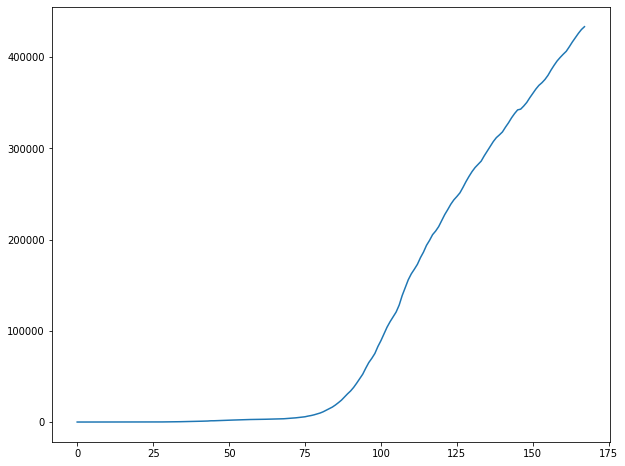

In [ ]:
# gráfico de linha para mortes no mundo
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

## Análise Exploratória para o Brasil 

A partir do que foi analisado, vimos que os casos no Brasil são realmente alarmantes e maiores que muitos outros países. Então vamos focar em uma análise exploratória dos dados brasileiros. 

Primeiramente, vamos criar um dataframe com os dados brasileiros.

In [ ]:
# Criar uma cópia do DataFrame apenas com o Brasil

df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3097,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3098,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3099,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3100,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3101,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


E analisar, neste dataframe, qual foi o porimeiro e último registro de casos no Brasil. 

In [ ]:
# qual a data que houve o último registro de casos no Brasil 
df_brasil.date.max()

Timestamp('2020-06-15 00:00:00')

In [ ]:
# qual a data em que houve o primeiro registro no brasil (mas aqui o total de casos era zero)

df_brasil.date.min()

Timestamp('2019-12-31 00:00:00')

Acima, verificamos que nosso dataset inclui datas desde 31-12-2019 até 15-06-2020.

Vamos verificar quando foram identificados o primeiro caso e a primeira morte no Brasil.


In [ ]:

# identificaçãso do primeiro caso (primeiro registro que não seja zero)  

df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)
print('O primeiro caso foi registrado em {}'.format(df_brasil.date.loc[3154]))  # não entendi esse número 3154

O primeiro caso foi registrado em 2020-02-26 00:00:00


In [ ]:
df_brasil.loc[df_brasil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3154,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [ ]:
# Identificar quando foi registrada a primeira morte no Brasil (quando a coluna de novas mortes apresenta maior que 0, imprimir somente a primeira linha quando encontrar com loc, numero 1 em novas mortes)

df_brasil.loc[df_brasil['new_deaths'] != 0.0].head(1) 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3175,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [ ]:
# Identificar quando foi identificada a primeira morte 

df_brasil.loc[df_brasil['new_deaths'] != 0.0]
print('A primeira morte foi registrada em {}'.format(df_brasil.date.loc[3175])) #consegui saber pelo head onde tava o registro da primeira morte e inseri o numero dela pra obter a resposta em forma de data

A primeira morte foi registrada em 2020-03-18 00:00:00


Descobrimos que a primeira morte foi dia 18 de março, mas que o primeiro caso foi no dia 26 de fevereiro. 

Uma informação interessante para investigarmos é quanto tempo levou desde o primeiro caso até a primeira morte.

In [ ]:
# Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
# calculando tempo desde o primeiro caso até a primeira morte

from datetime import date
delta = df_brasil.date.loc[3175] - df_brasil.date.loc[3154]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


Foi possível observar que do primeiro caso até a primeira morte passaram 21 dias. 

In [ ]:
# identificar a última data de registro no brasil  (ultima data do banco de dados inicial)

df_brasil.date.max() 


Timestamp('2020-06-15 00:00:00')

In [ ]:
df_brasil.loc[df.date == '2020-06-15']

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
3264,BRA,South America,Brazil,2020-06-15,867624.0,17110.0,43332.0,612.0,4081.795,80.495,203.858,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


In [ ]:
# quantos dias se passaram do primeiro dia até o último registro de casos no Brasil 

delta = df_brasil.date.loc[3264] - df_brasil.date.loc[3154]
print('Se passaram {} dias entre o primeiro caso ao último registro no Brasil.'.format(delta.days))

Se passaram 110 dias entre o primeiro caso ao último registro no Brasil.


Se passaram 110 dias entre o primeiro caso ao último registro no Brasil (até a data de 15 de junho).

Por fim, vamos plotar gráficos de linha para compararmos a evolução dos casos e mortes no Brasil.

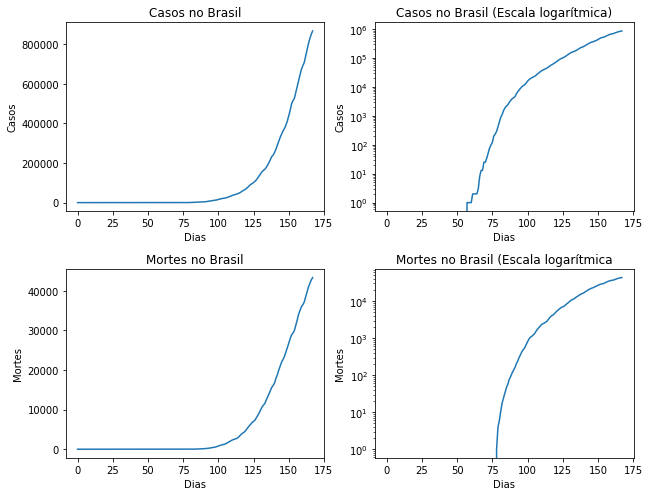

In [ ]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(168))  #o que é esse número 168? 
y = df_brasil['total_cases']
z = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, y)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, y)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z)
plt.tight_layout()

## Conclusão 

É importante relembrar que esta análise foi realizada com o banco de dados atualizado até dia 15 de junho, ou seja, como os dados são medidos e arquivados diariamente, a perspectiva dos resultados podem mudar a cada atualização deste banco de dados. Sendo assim, é interessante refazer sempre que possível para acompanhar a dinâmica da evolução dos casos. 

A complexidade do banco de dados nos permite extrair inúmeras informações de diversas naturezas. No entanto, este projeto teve como objetivo ser sucinto e fazer uma análise geral do contágio e mortes no mundo e posteriormente no Brasil. Entretanto, mesmo que sucinto, e levando em consideração o contexto do que foi analisado, podemos destacar informações bastante úteis como: os Estados Unidos estão disparados em relação aos casos e mortes, a evolução dos casos no Brasil está em crescimento avassalador e no geral, casos e mortes ainda estão crescendo e que o tempo entre o primeiro caso e a primeira morte é relativamente curto, e portanto, bastante preocupante. 

